In [1]:
!git clone https://github.com/hungpham13/Distributed-data-discretization
%cd Distributed-data-discretization/
!pip install -r requirements.txt

Cloning into 'Distributed-data-discretization'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 131 (delta 67), reused 71 (delta 30), pack-reused 0
Receiving objects: 100% (131/131), 24.49 MiB | 28.49 MiB/s, done.
Resolving deltas: 100% (67/67), done.
/content/Distributed-data-discretization
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 283 kB 37.8 MB/s 


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

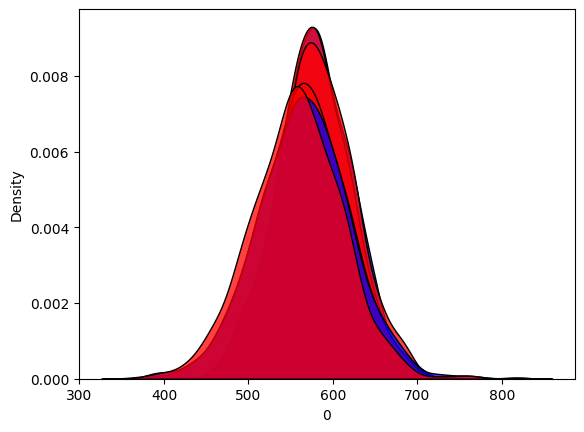

     0    1    2    3    4    5    6    7    8    9  ...  991  992  993  994  \
0  580  534  534  592  594  586  649  536  563  583  ...  581  619  572  491   
1  538  592  533  621  541  619  574  605  606  587  ...  545  595  499  559   
2  521  575  533  617  598  559  620  533  552  557  ...  607  582  590  571   
3  580  542  591  590  598  624  579  465  525  626  ...  577  536  554  658   
4  605  687  618  573  489  612  471  530  643  570  ...  621  508  539  664   
5  550  524  604  669  543  573  590  550  511  479  ...  561  524  516  494   

   995  996  997  998  999  Labels  
0  605  673  587  614  538       0  
1  502  544  546  522  578       1  
2  618  618  650  615  632       1  
3  487  576  528  579  468       1  
4  621  510  519  561  567       0  
5  530  548  567  605  610       1  

[6 rows x 1001 columns]


In [11]:
from data.gen_data import generate_data
datas = []
# for num_days in [30, 6*30, 365, 2*365, 3*365, 5*365]:
#     for num_sample in [10000, 100000, 1000000, 10000000]:
#         for dist in ['normal', 'logistic', 'uniform']:
#             datas.append(generate_data(num_days, num_sample, dist))
data = generate_data(100, 1000, 'normal')

<AxesSubplot: ylabel='Density'>

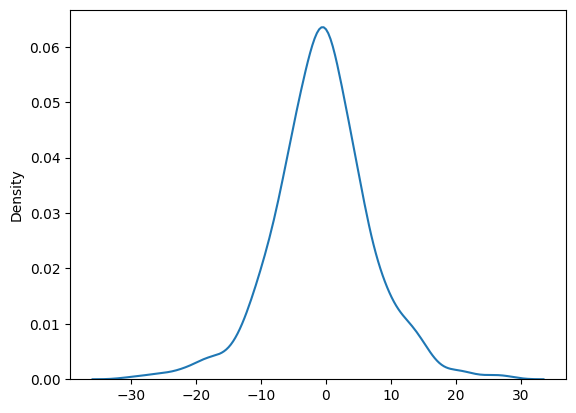

In [27]:
import numpy as np
import seaborn as sns
s = np.random.logistic(0, 4, 1000).tolist()
sns.kdeplot(s)

100


StopIteration: 

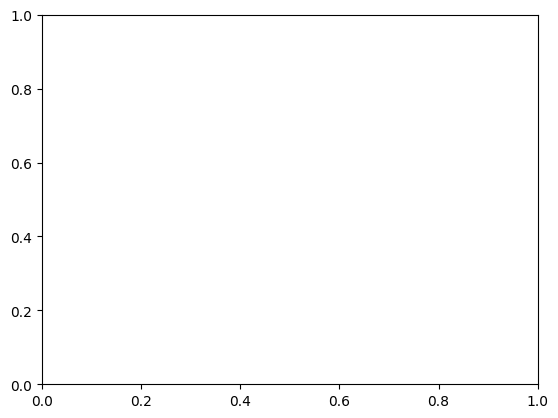

In [10]:
import numpy as np
import seaborn as sns

s = np.random.uniform(0, 2, 100).tolist()
print(len(s))
sns.histplot(s, bins=20)

In [2]:
from model.equal_bin import predict

predict(data, breakpoints=[300, 306, 310, 313, 314, 315, 316, 318, 319, 321, 850])


[[356   0]
 [343   0]]
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       356
           1       0.00      0.00      0.00       343

    accuracy                           0.51       699
   macro avg       0.25      0.50      0.34       699
weighted avg       0.26      0.51      0.34       699



/home/hung/Distributed-data-discretization/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hung/Distributed-data-discretization/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hung/Distributed-data-discretization/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [4]:
print('max',data.drop('Labels', axis=1).max(axis=1).max())
print('min',data.drop('Labels', axis=1).min(axis=1).min())

max 816
min 331


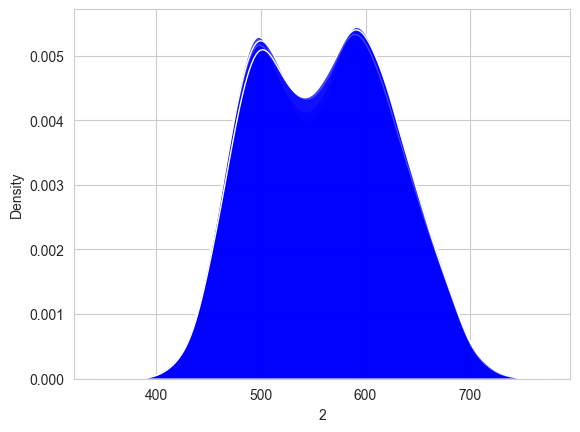

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,Labels
2,557,621,476,667,568,491,448,572,604,547,...,601,532,554,577,560,559,537,574,614,1
3,625,602,585,548,516,490,662,581,598,583,...,546,509,444,613,581,592,591,506,585,1
4,592,580,544,571,524,457,439,584,632,588,...,443,573,539,614,562,543,519,541,496,1
5,565,531,675,480,448,656,641,654,585,482,...,598,665,519,471,454,591,635,466,608,1


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

r = (2,5)
plt.figure()
for i,row in data.loc[r[0]:r[1]].iterrows():
    sns.kdeplot(row.drop('Labels'), color= 'red' if row['Labels'] == 0 else 'blue', multiple='stack')
plt.show()
data.loc[r[0]:r[1]]

In [8]:
data.to_csv('new_pseudo_data.csv')

In [9]:
import pandas as pd
data = pd.read_csv('new_pseudo_data.csv')
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,Labels
0,0,539,466,488,559,543,567,541,576,473,...,461,457,494,470,493,495,493,462,502,1
1,1,667,540,517,614,505,469,517,606,657,...,676,633,505,622,467,463,613,433,611,0
2,2,557,621,476,667,568,491,448,572,604,...,601,532,554,577,560,559,537,574,614,1
3,3,625,602,585,548,516,490,662,581,598,...,546,509,444,613,581,592,591,506,585,1
4,4,592,580,544,571,524,457,439,584,632,...,443,573,539,614,562,543,519,541,496,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,695,493,638,487,489,544,566,584,523,556,...,663,619,498,563,554,579,535,503,584,1
696,696,541,562,579,592,494,500,539,576,648,...,612,506,556,558,619,581,589,525,502,0
697,697,597,669,626,630,611,602,539,574,604,...,599,564,604,606,544,531,604,552,507,0
698,698,532,492,487,591,593,667,563,565,560,...,539,572,548,588,638,481,579,531,617,1


In [ ]:
Truth_False_index = []
for i in range(699):
    if data['Label'].loc[i]|data['Label'].loc[i+1] == 1:
        Truth_False_index.append(i)

In [ ]:
True_predict = list(set(Truth_False_index) & set(false_index))
True_predict.sort()
True_predict

[0,
 6,
 8,
 15,
 16,
 22,
 23,
 32,
 33,
 54,
 55,
 90,
 91,
 104,
 105,
 110,
 111,
 123,
 124,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 150,
 151,
 168,
 169,
 188,
 189,
 207,
 208,
 220,
 221,
 222,
 228,
 229,
 238,
 239,
 240,
 253,
 254,
 263,
 264,
 275,
 277,
 278,
 279,
 293,
 294,
 298,
 299,
 301,
 302,
 309,
 310,
 311,
 312,
 315,
 316,
 329,
 330,
 332,
 334,
 335,
 337,
 338,
 343,
 344,
 363,
 364,
 372,
 373,
 381,
 382,
 393,
 394,
 404,
 405,
 407,
 408,
 413,
 414,
 435,
 436,
 474,
 475,
 487,
 488,
 506,
 507,
 517,
 519,
 520,
 521,
 544,
 545,
 550,
 552,
 553,
 561,
 562,
 566,
 567,
 568,
 569,
 580,
 581,
 583,
 584,
 592,
 605,
 606,
 654,
 655,
 664,
 665,
 674,
 675,
 681,
 682,
 686,
 687]

In [ ]:
len(True_predict)

125

In [ ]:
acc = len(True_predict)/len(Truth_False_index)
acc

0.9541984732824428

<AxesSubplot:>

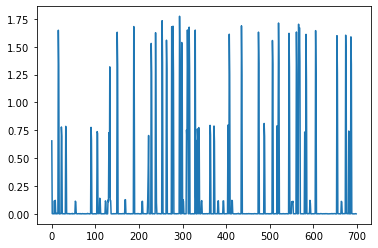

In [ ]:
sns.lineplot(x = [i for i in range(699)], y = psi_list)

In [ ]:
psi_list

[0.6554616446025187,
 0.00307836575997679,
 0.0016816819661602742,
 0.0017428896793646083,
 0.0018763501390288806,
 0.0015975776633448853,
 0.1187231136909347,
 0.0021978240511302135,
 0.12205671593718916,
 0.002081792025107919,
 0.001927601528525303,
 0.005609679946798963,
 0.0017932748837567538,
 0.002321044382126428,
 0.0029702382257913856,
 1.6473720101346967,
 1.3338092976223885,
 0.0003757204011596923,
 0.0006051267062459223,
 0.0024751673960933464,
 0.0017632389869012414,
 0.0019105321799705182,
 0.7799519214407544,
 0.6973027791410468,
 0.0023778842063447454,
 0.0013468578533110545,
 0.0012486121420377289,
 0.002303177703250898,
 0.0017057667486959297,
 0.0007595033755266891,
 0.0008007625724595911,
 0.001420934670916733,
 0.7855862722126412,
 0.6797232013303214,
 0.002874001460901058,
 0.002228300282938395,
 0.0019383228373762188,
 0.0027691890636620383,
 0.002571415406327669,
 0.002203110867574051,
 0.0035659049587503495,
 0.0006075222125100342,
 0.001016310522956398,
 0.0013

0.1187231136909347


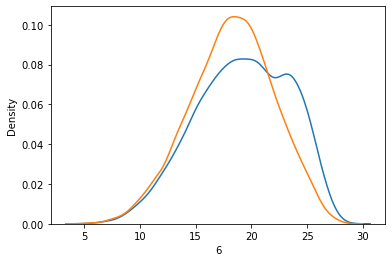

In [ ]:
sns.kdeplot(data_distribution.loc[6])
sns.kdeplot(data_distribution.loc[7])
print(psi_list[6])

0.0021978240511302135


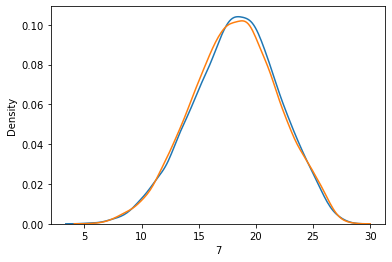

In [ ]:
sns.kdeplot(data_distribution.loc[7])
sns.kdeplot(data_distribution.loc[8])
print(psi_list[7])

0.12205671593718916


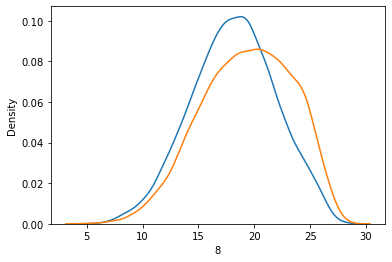

In [ ]:
sns.kdeplot(data_distribution.loc[8])
sns.kdeplot(data_distribution.loc[9])
print(psi_list[8])